In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


import warnings

warnings.filterwarnings("ignore")

In [32]:
# Definimos una función para asignar las categorías
def asignar_categoria(media):
    if media < 10:
        return "suspenso"
    else:
        return "aprobado"

Leemos los datos del dataset

In [33]:
# Lee el archivo CSV
df = pd.read_csv('student.csv')

# Calculamos la media de las columnas G1 y G2
df['Media_G1_G2'] = df[['G1', 'G2']].mean(axis=1)

# Aplicamos la función a la nueva columna para crear la columna de categorías
df['Calificacion'] = df['Media_G1_G2'].apply(asignar_categoria)
    
# Con esta función seleccionamos los atributos categóricos y los transformamos a codificación one-hot
categorical_columns = df.select_dtypes(include=['object']).columns
for i in categorical_columns:
    if len(df[i].unique()) == 2:
        # Si solo hay dos categorías, usar LabelEncoder
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    else:
        df_dummies = pd.get_dummies(df[i], prefix=i)
        df = pd.concat([df.drop(i, axis=1), df_dummies],axis=1)
df['Media_G1_G2'] = df['Media_G1_G2'].astype(int)
print(df.info())

#feature_names = df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             649 non-null    int64
 1   sex                649 non-null    int64
 2   age                649 non-null    int64
 3   address            649 non-null    int64
 4   famsize            649 non-null    int64
 5   Pstatus            649 non-null    int64
 6   Medu               649 non-null    int64
 7   Fedu               649 non-null    int64
 8   traveltime         649 non-null    int64
 9   studytime          649 non-null    int64
 10  schoolsup          649 non-null    int64
 11  famsup             649 non-null    int64
 12  paid               649 non-null    int64
 13  activities         649 non-null    int64
 14  nursery            649 non-null    int64
 15  higher             649 non-null    int64
 16  internet           649 non-null    int64
 17  romantic        

Particionamos los datos en train y test, luego dividimos de nuevo para los dos conjuntos de notas que tenemos

In [34]:
# Hacemos un particionamiento estándar, 60% para train y 40% para test
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)



# Sacamos los atributos target
y_train_G1 = train_data['G1']
y_train_G2 = train_data['G2']
y_train_media = train_data['Media_G1_G2']


# Definimos X con el resto de atributos que no son los targets
X_train = train_data.drop(['G1', 'G2','Media_G1_G2','Calificacion'], axis=1)

# Definimos los conjuntos de Test
y_test_G1 = test_data['G1']
y_test_G2 = test_data['G2']
y_test_media = test_data['Media_G1_G2']

# Sacamos los atributos de validacion
y_test_G1 = val_data['G1']
y_test_G2 = val_data['G2']
y_test_media = val_data['Media_G1_G2']

# Definimos X con el resto de atributos que no son los targets
X_test = test_data.drop(['G1', 'G2','Media_G1_G2','Calificacion'], axis=1)
X_val = val_data.drop(['G1', 'G2','Media_G1_G2','Calificacion'], axis=1)


y_train_calificacion = train_data['Calificacion']
y_test_calificacion = test_data['Calificacion']
y_val_calificacion = val_data['Calificacion']

Estandarizamos todos los datos que vamos a emplear

In [35]:
# Creamos el estandarizador
scaler = StandardScaler()

# Ajustamos el estandarizador con los datos de entrenamiento y luego transformamos los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformamos los datos de prueba con el estandarizador ajustado
X_test = scaler.transform(X_test)


X_val = scaler.transform(X_val)

Creamos y entrenamos el modelo. Calculamos los atributos del modelo, como su salida, error y accuracy

In [36]:
# Aplicamos el modelo de regresión lineal
modelo_lineal_G1 = LinearRegression()
modelo_lineal_G2 = LinearRegression()
modelo_lineal_media = LinearRegression()

# Entrenamos el modelo
modelo_lineal_G1.fit(X_train, y_train_G1)
modelo_lineal_G2.fit(X_train, y_train_G2)
modelo_lineal_media.fit(X_train, y_train_media)

# Calculamos la salida del modelo
y_pred_G1 = modelo_lineal_G1.predict(X_test)
y_pred_G2 = modelo_lineal_G2.predict(X_test)
y_pred_media = modelo_lineal_media.predict(X_test)

# Medimos el error cuadrático medio del modelo
mse_G1 = mean_squared_error(y_test_G1, y_pred_G1)
mse_G2 = mean_squared_error(y_test_G2, y_pred_G2)
mse_media = mean_squared_error(y_test_media, y_pred_media)

# Redondeamos las predicciones al entero más cercano
y_pred_G1_rounded = np.round(y_pred_G1)
y_pred_G2_rounded = np.round(y_pred_G2)
y_pred_media_rounded = np.round(y_pred_media)

# Calculamos la precisión del modelo
accuracy_G1 = accuracy_score(y_test_G1, y_pred_G1_rounded)
accuracy_G2 = accuracy_score(y_test_G2, y_pred_G2_rounded)
accuracy_media = accuracy_score(y_test_media, y_pred_media_rounded)

print("Precision para G1 = ", round(accuracy_G1*100,2), "%")
print("Precision para G2 = ", round(accuracy_G2*100,2), "%")
print("Precision para Media = ", round(accuracy_media*100,2), "%")

# Generamos las predicciones del modelo para los datos de entrenamiento
y_train_pred_G1 = modelo_lineal_G1.predict(X_train)
y_train_pred_G2 = modelo_lineal_G2.predict(X_train)
y_train_pred_media = modelo_lineal_media.predict(X_train)

Precision para G1 =  12.31 %
Precision para G2 =  8.46 %
Precision para Media =  15.38 %


Graficamos los datos que hemos calculado

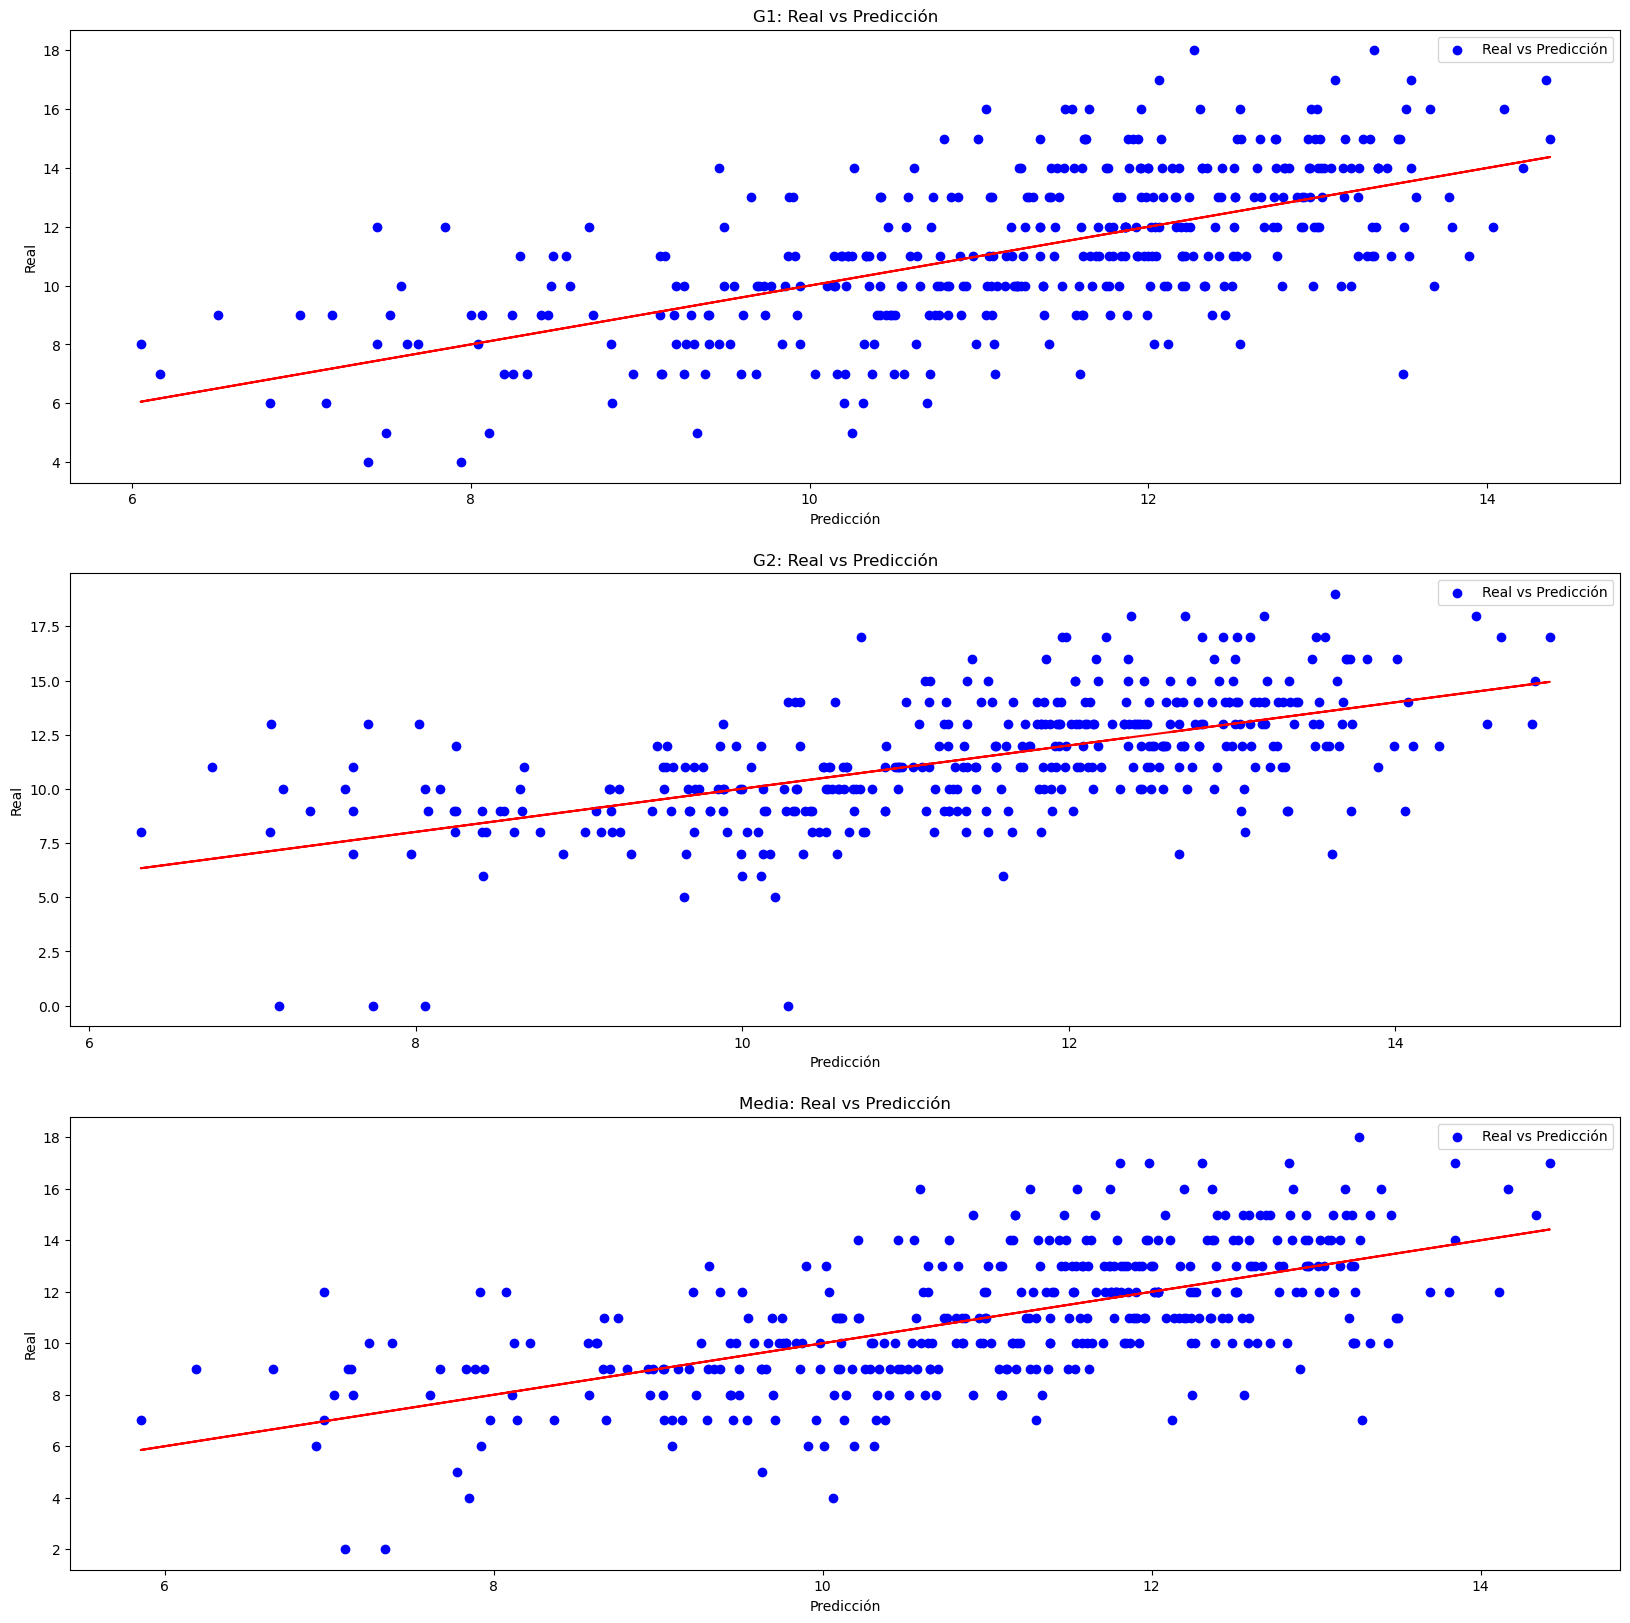

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Creamos una figura y un conjunto de subtramas
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

# Graficamos los datos reales y las predicciones del modelo para G1
ax[0].scatter(y_train_pred_G1, y_train_G1, color='blue', label='Real vs Predicción')

# Añadimos la línea de regresión lineal
m, b = np.polyfit(y_train_pred_G1, y_train_G1, 1)
ax[0].plot(y_train_pred_G1, m*y_train_pred_G1 + b, color='red')

ax[0].set_title('G1: Real vs Predicción')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')
ax[0].legend()

# Graficamos los datos reales y las predicciones del modelo para G2
ax[1].scatter(y_train_pred_G2, y_train_G2, color='blue', label='Real vs Predicción')

# Añadimos la línea de regresión lineal
m, b = np.polyfit(y_train_pred_G2, y_train_G2, 1)
ax[1].plot(y_train_pred_G2, m*y_train_pred_G2 + b, color='red')

ax[1].set_title('G2: Real vs Predicción')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')
ax[1].legend()

# Graficamos los datos reales y las predicciones del modelo para Media
ax[2].scatter(y_train_pred_media, y_train_media, color='blue', label='Real vs Predicción')

# Añadimos la línea de regresión lineal
m, b = np.polyfit(y_train_pred_media, y_train_media, 1)
ax[2].plot(y_train_pred_media, m*y_train_pred_media + b, color='red')

ax[2].set_title('Media: Real vs Predicción')
ax[2].set_xlabel('Predicción')
ax[2].set_ylabel('Real')
ax[2].legend()

# Mostramos la figura
plt.show()

Grado del polinomio: 3
Precision para G1 =  13.85 %
Precision para G2 =  12.31 %
Precision para Media =  13.85 %




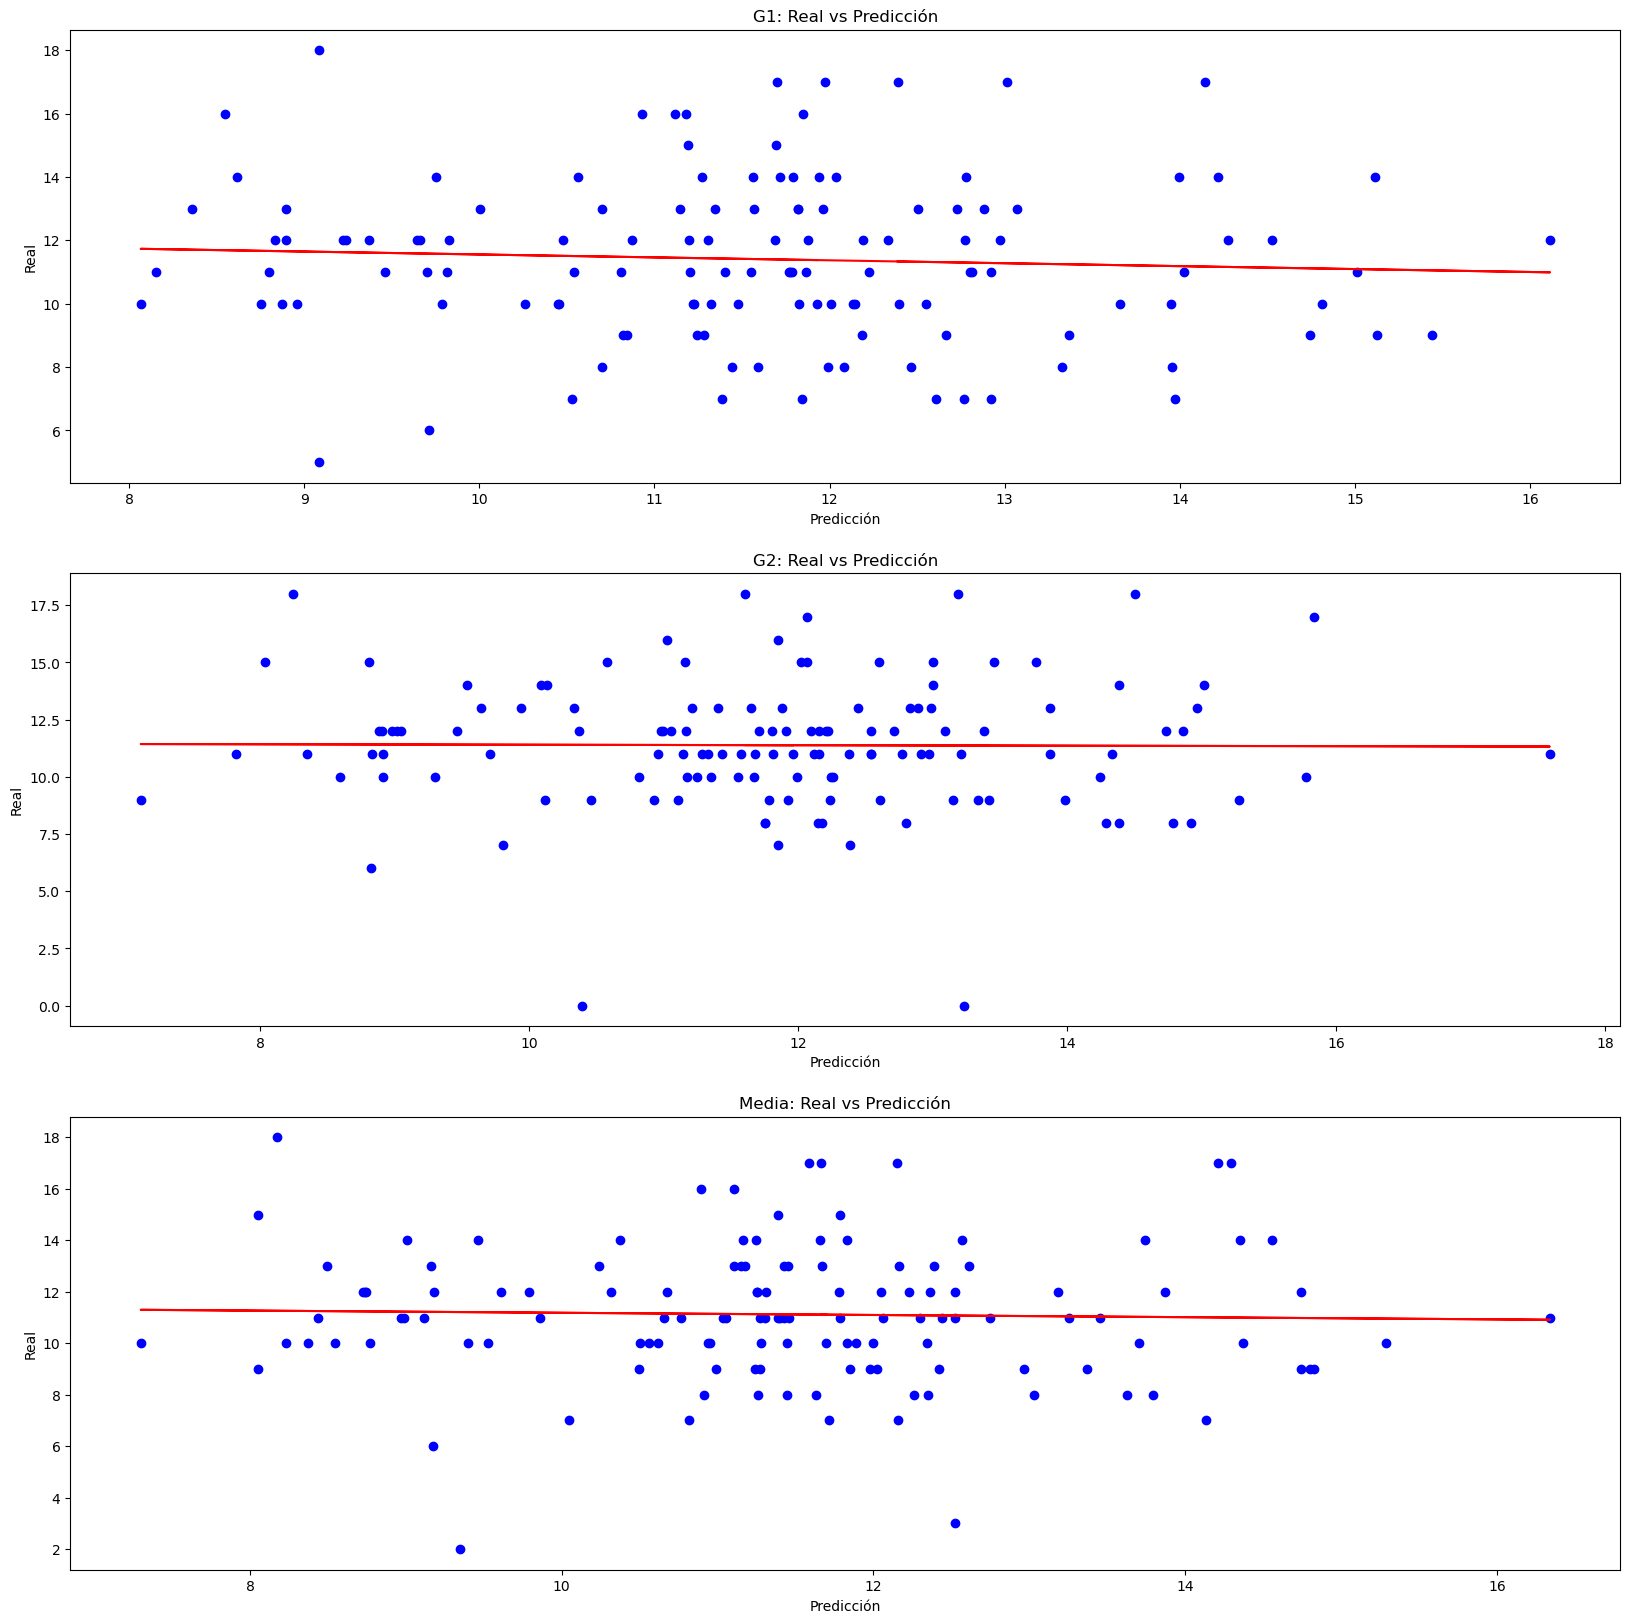

In [38]:
# Creamos una instancia de StandardScaler para estandarizar nuestros datos
scaler_G1 = StandardScaler()
scaler_G2 = StandardScaler()
scaler_media = StandardScaler()

# Ajustamos y transformamos los datos de entrenamiento y luego transformamos los datos de prueba
X_train = scaler_G1.fit_transform(X_train)
X_test = scaler_G1.transform(X_test)

# Creamos una instancia de LinearRegression
model_G1 = LinearRegression()
model_G2 = LinearRegression()
model_media = LinearRegression()

degree = 3

# Creamos una instancia de PolynomialFeatures para transformar nuestros datos a un espacio polinomial
poly = PolynomialFeatures(degree=degree)

# Transformamos nuestros datos de entrenamiento y de prueba
X_train_poly_G1 = poly.fit_transform(X_train)
X_test_poly_G1 = poly.transform(X_test)

X_train_poly_G2 = poly.fit_transform(X_train)
X_test_poly_G2 = poly.transform(X_test)

X_train_poly_media = poly.fit_transform(X_train)
X_test_poly_media = poly.transform(X_test)

# Entrenamos el modelo
model_G1.fit(X_train_poly_G1, y_train_G1)
model_G2.fit(X_train_poly_G2, y_train_G2)
model_media.fit(X_train_poly_media, y_train_media)

# Hacemos predicciones
y_pred_G1 = model_G1.predict(X_test_poly_G1)
y_pred_G2 = model_G2.predict(X_test_poly_G2)
y_pred_media = model_media.predict(X_test_poly_media)

# Calculamos la precisión del modelo
precision_G1 = accuracy_score(y_test_G1, np.round(y_pred_G1))
precision_G2 = accuracy_score(y_test_G2, np.round(y_pred_G2))
precision_media = accuracy_score(y_test_media, np.round(y_pred_media))

print(f"Grado del polinomio: {degree}")
print("Precision para G1 = ", round(precision_G1*100,2), "%")
print("Precision para G2 = ", round(precision_G2*100,2), "%")
print("Precision para Media = ", round(precision_media*100,2), "%")
print("\n")

# Creamos una figura y un conjunto de subtramas
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

# Graficamos los datos reales y las predicciones del modelo para G1
ax[0].scatter(y_pred_G1, y_test_G1, color='blue')

# Añadimos la línea de regresión lineal
m, b = np.polyfit(y_pred_G1, y_test_G1, 1)
ax[0].plot(y_pred_G1, m*y_pred_G1 + b, color='red')

ax[0].set_title('G1: Real vs Predicción')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

# Graficamos los datos reales y las predicciones del modelo para G2
ax[1].scatter(y_pred_G2, y_test_G2, color='blue')

# Añadimos la línea de regresión lineal
m, b = np.polyfit(y_pred_G2, y_test_G2, 1)
ax[1].plot(y_pred_G2, m*y_pred_G2 + b, color='red')

ax[1].set_title('G2: Real vs Predicción')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

# Graficamos los datos reales y las predicciones del modelo para G2
ax[2].scatter(y_pred_media, y_test_media, color='blue')

# Añadimos la línea de regresión lineal
m, b = np.polyfit(y_pred_media, y_test_media, 1)
ax[2].plot(y_pred_media, m*y_pred_media + b, color='red')

ax[2].set_title('Media: Real vs Predicción')
ax[2].set_xlabel('Predicción')
ax[2].set_ylabel('Real')

# Mostramos la figura
plt.show()

### Regresion Logística

In [39]:
# Aplicamos el modelo de regresion logistica

modelo_logistico_calificacion = LogisticRegression()


#Definimos los parametros posibles de nuestro modelo
param_grid = {
    'C': [0.1, 0.5, 1, 10],              
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
    'multi_class': ['ovr', 'multinomial'],
    'penalty': ['l1', 'l2']
}

grid_search_log = GridSearchCV(modelo_logistico_calificacion, param_grid, cv=5, scoring='accuracy')

# Ejecutar la búsqueda en el conjunto de datos
grid_search_log.fit(X_train, y_train_calificacion)

# Obtener el mejor modelo y sus parámetros
best_model_log = grid_search_log.best_estimator_
best_params_log = grid_search_log.best_params_


print("Mejores parámetros:", best_params_log)

#Precision Validacion
y_pred_val = best_model_log.predict(X_val)
precision_calificacion_val = accuracy_score(y_val_calificacion, y_pred_val)
print("Precision validacion: ", 100 * precision_calificacion_val)

#Precision Test
y_pred_test = best_model_log.predict(X_test)
precision_calificacion_test = accuracy_score(y_test_calificacion, y_pred_test)
print("Precision test: ", 100 * precision_calificacion_test)

Mejores parámetros: {'C': 1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
Precision validacion:  81.53846153846153
Precision test:  80.0


# Estudio de atributos mas significativos

In [40]:
# Imprimir los coeficientes del modelo
print("Coeficientes del modelo: ")
for i, coef in enumerate(best_model_log.coef_[0]):
    print(f"{df.columns[i]}: {coef}")
# Calcular la importancia de las características
importance = np.abs(best_model_log.coef_[0])

# Ordenar las características por importancia
indices = np.argsort(importance)

# Imprimir las características más importantes
print("\nCaracterísticas más importantes:")
for i in range(1, 11):
    print(f"{df.columns[indices[-i]]}: {importance[indices[-i]]}")

Coeficientes del modelo: 
school: 0.7173756622787146
sex: 0.21675055878543004
age: 0.40350365890848605
address: 0.0
famsize: 0.03903879909638176
Pstatus: 0.17813662807704472
Medu: -0.020847784957491372
Fedu: -0.358905638385835
traveltime: 0.1273402330319984
studytime: -0.17718506804908427
schoolsup: 0.4312707195601244
famsup: 0.1248222027792905
paid: 0.05445940151198469
activities: -0.1423793033509158
nursery: 0.0771984773054174
higher: -0.6413102153718556
internet: -0.15383288767807754
romantic: 0.11563266882271758
famrel: -0.298588162846304
freetime: 0.22713484917031046
goout: 0.0
Dalc: 0.35478422861000625
Walc: -0.13375334340196685
health: 0.060586571172173566
absences: 0.3781738418690539
G1: 0.0
G2: 0.2777073090077208
Media_G1_G2: 0.06782396547214671
Calificacion: -0.1402085379777402
Mjob_at_home: -0.1212380861000738
Mjob_health: -0.2740832286753839
Mjob_other: 0.04674851185088746
Mjob_services: -0.10323387296954976
Mjob_teacher: 0.10817535038468047
Fjob_at_home: 0.0
Fjob_health: 0

### Ensembles Adaboost

In [41]:
mejor_acc_calificacion = 0
precision = []


clasificadores = np.arange(1, 29)

for i in (clasificadores):
    #Defininos el clasificadores base
    clasificador_base = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    
    #Definimos el modelo y entrenamos
    adaboost = AdaBoostClassifier(base_estimator=clasificador_base, n_estimators=i, random_state=12)
    adaboost.fit(X_train, y_train_calificacion)
    
    #Calculamos la precision
    accuracy_calificacion = round(100*adaboost.score(X_test, y_test_calificacion), 2)
    
    #Añadimos las precisiones a su correspondiente lista para dibujarlas en las graficas
    precision.append(accuracy_calificacion)
    
    #Comprobamos cual es el mejor numero de clasificadores para obtener la mayor precision
    if (accuracy_calificacion >= mejor_acc_calificacion):
        mejor_acc_calificacion = accuracy_calificacion
        mejor_num_clasificadores_calificacion = i
    
print("El mejor numero de clasificadores es: " + str(mejor_num_clasificadores_calificacion) + ", con una precision del: " + str(mejor_acc_calificacion), "%")

El mejor numero de clasificadores es: 2, con una precision del: 80.77 %


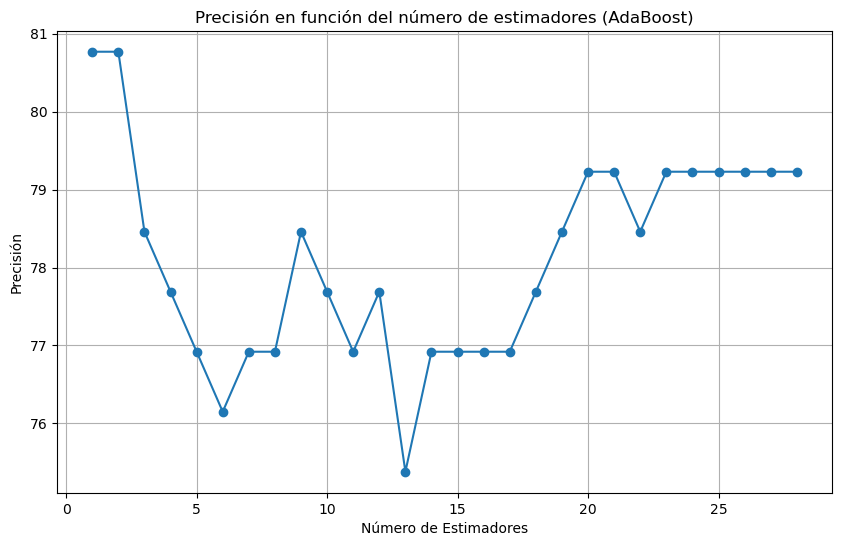

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(clasificadores, precision, marker='o')
plt.title('Precisión en función del número de estimadores (AdaBoost)')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()
    

# Adaboost con GridSearch

In [43]:
#Defininos el clasificadores base
clasificador_base = DecisionTreeClassifier(criterion='entropy', max_depth=1)

param_grid = {
    'n_estimators': list(range(1, 30))
}

adaboost = AdaBoostClassifier(base_estimator=clasificador_base)
grid_search_adaboost = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy')

# Ejecutar la búsqueda en el conjunto de datos
grid_search_adaboost.fit(X_train, y_train_calificacion)

# Obtener el mejor modelo y sus parámetros
best_model_adaboost = grid_search_adaboost.best_estimator_
best_params_adaboost = grid_search_adaboost.best_params_

print("Mejores parámetros:", best_params_adaboost)


#Precision Validacion
y_pred_val = best_model_adaboost.predict(X_val)
precision_calificacion_val = accuracy_score(y_val_calificacion, y_pred_val)
print("Precision validacion: ", 100 * precision_calificacion_val)

#Precision Test
y_pred_test = best_model_adaboost.predict(X_test)
precision_calificacion_test = accuracy_score(y_test_calificacion, y_pred_test)
print("Precision test: ", 100 * precision_calificacion_test)

Mejores parámetros: {'n_estimators': 16}
Precision validacion:  78.46153846153847
Precision test:  76.92307692307693


### Red Neuronal

In [44]:
clasificador = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(j,i) for i in range(1, 3)for j in range(1, 5)],
    'max_iter': list(range(1, 30)),
    'solver': ['lbfgs', 'sgd', 'adam']
}

grid_search_red = GridSearchCV(clasificador, param_grid, cv=5, scoring='accuracy')


# Ejecutar la búsqueda en el conjunto de datos
grid_search_red.fit(X_train, y_train_calificacion)

# Obtener el mejor modelo y sus parámetros
best_model_red = grid_search_red.best_estimator_
best_params_red = grid_search_red.best_params_

# Calcular la salida del mejor modelo
y_pred_calificacion = best_model_red.predict(X_test)

# Medir la precisión del mejor modelo
precision_calificacion = accuracy_score(y_test_calificacion, y_pred_calificacion)

print("Mejores parámetros:", best_params_red)

y_pred_val = best_model_red.predict(X_val)
precision_calificacion_val = accuracy_score(y_val_calificacion, y_pred_val)
print("Precision validacion: ", 100 * precision_calificacion_val)

#Precision Test
y_pred_test = best_model_red.predict(X_test)
precision_calificacion_test = accuracy_score(y_test_calificacion, y_pred_test)
print("Precision test: ", 100 * precision_calificacion_test)

Mejores parámetros: {'hidden_layer_sizes': (4, 2), 'max_iter': 15, 'solver': 'lbfgs'}
Precision validacion:  82.3076923076923
Precision test:  80.0


In [45]:
"""
max_acc = 0
max_hidden_layer = 0
max_iteration = 0

accuracies = np.zeros(15)

for i in range(1, 3):
    for j in range(1, 100):
        clasificador = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(i,), max_iter=j)
        clasificador.fit(X_train, y_train_calificacion)

        y_pred = clasificador.predict(X_test)

        accuracy = accuracy_score(y_test_calificacion, y_pred)
        
        if (accuracy >= max_acc):
            max_hidden_layer = i
            max_acc = accuracy
            max_iteration = j

print("El mejor numero de capas es: " + str(max_hidden_layer) + ", con una precision del: " + str(round(max_acc*100,2)), "%")
print("Iteraciones: " + str(max_iteration))

# Imprimir los pesos de la red neuronal
print("Pesos de la red neuronal: ")
for i in range(len(clasificador.coefs_)):
    num_arrays = len(clasificador.coefs_[i])
    for j in range(num_arrays):
        print("Capa ",i," array ",j,": ",clasificador.coefs_[i][j])
print( )
print('Atributos mas importantes:')
from sklearn.inspection import permutation_importance

# Asumiendo que 'clasificador' es tu modelo ya entrenado y 'X_test' tus datos de prueba
result = permutation_importance(clasificador, X_test, y_test_calificacion, n_repeats=10)

# Organizar las características por importancia
sorted_idx = result.importances_mean.argsort()

# Imprimir las características y su importancia
for i in sorted_idx:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{feature_names[i]:<8}"
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")
              
"""

'\nmax_acc = 0\nmax_hidden_layer = 0\nmax_iteration = 0\n\naccuracies = np.zeros(15)\n\nfor i in range(1, 3):\n    for j in range(1, 100):\n        clasificador = MLPClassifier(solver=\'lbfgs\', hidden_layer_sizes=(i,), max_iter=j)\n        clasificador.fit(X_train, y_train_calificacion)\n\n        y_pred = clasificador.predict(X_test)\n\n        accuracy = accuracy_score(y_test_calificacion, y_pred)\n        \n        if (accuracy >= max_acc):\n            max_hidden_layer = i\n            max_acc = accuracy\n            max_iteration = j\n\nprint("El mejor numero de capas es: " + str(max_hidden_layer) + ", con una precision del: " + str(round(max_acc*100,2)), "%")\nprint("Iteraciones: " + str(max_iteration))\n\n# Imprimir los pesos de la red neuronal\nprint("Pesos de la red neuronal: ")\nfor i in range(len(clasificador.coefs_)):\n    num_arrays = len(clasificador.coefs_[i])\n    for j in range(num_arrays):\n        print("Capa ",i," array ",j,": ",clasificador.coefs_[i][j])\nprint( )

('RegresionLogistica', 80.0)
[('RegresionLogistica', 83.03341902313625, 81.53846153846153, 80.0), ('Adaboost', 81.74807197943444, 78.46153846153847, 76.92307692307693), ('RedNeuronal', 93.05912596401028, 76.92307692307693, 73.07692307692307)]


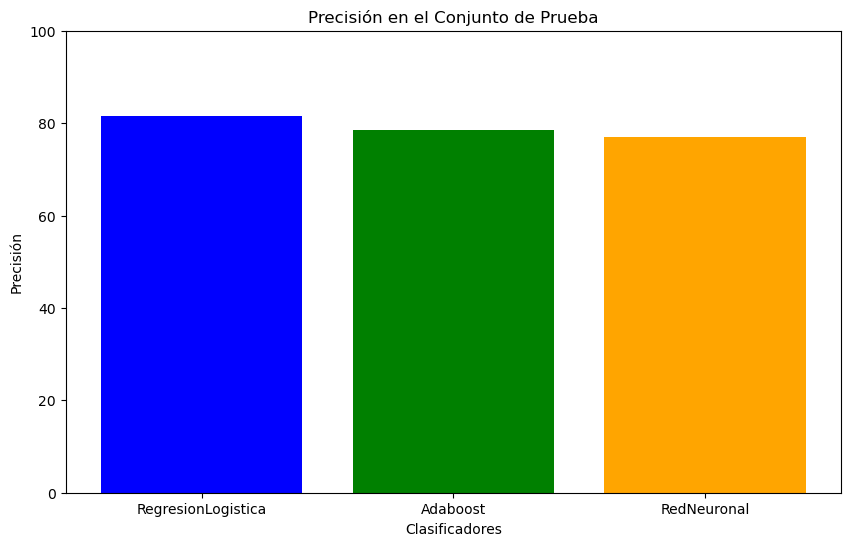

In [50]:

clasificadores = [LogisticRegression(C=best_model_log.C, penalty=best_model_log.penalty, solver=best_model_log.solver, multi_class=best_model_log.multi_class),
                  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1), n_estimators=best_model_adaboost.n_estimators),
                  MLPClassifier(hidden_layer_sizes = best_model_red.hidden_layer_sizes, max_iter=best_model_red.max_iter, solver=best_model_red.solver)]



nombres = ['RegresionLogistica', 'Adaboost', 'RedNeuronal']
winners = []
best_val = 0

# Inicializar precisiones
precision = []
ganador = (0, 0)
bestPres = 0

for i, clasificador in enumerate(clasificadores):
    # Construir clasificador, entrenarlo, obtener precisiones
    clasificador.fit(X_train, y_train_calificacion)
    accTrain = 100 * clasificador.score(X_train, y_train_calificacion)
    accVal = 100 * clasificador.score(X_val, y_val_calificacion)
    accTest = 100 * clasificador.score(X_test, y_test_calificacion)
    precision.append((nombres[i], accTrain, accVal, accTest))

    if (accVal > bestPres):
        bestPres = accVal
        ganador = (nombres[i], accTest)

# Precisión en el conjunto de prueba
prec_test = [result[2] for result in precision]
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres, prec_test, color=['blue', 'green', 'orange'])
plt.title('Precisión en el Conjunto de Prueba')
plt.xlabel('Clasificadores')
plt.ylabel('Precisión')
plt.ylim(0, 100)  # Ajusta según tus valores de precisión
plt.show()

## K-Means

In [47]:
# Lee el archivo CSV
df = pd.read_csv('student.csv')

# Selecciona solo las columnas 'G1' y 'G2'
df = df[['G1', 'G2']]

# Divide los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Estandariza los datos de entrenamiento
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Estandariza los datos de prueba
test_data_scaled = scaler.transform(test_data)

# Inicializa la lista para guardar los índices de Davies-Bouldin
db_scores = []

# Prueba diferentes valores de k
for k in range(2, 10):
    # Crea el modelo de K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Ajusta el modelo a los datos de entrenamiento
    kmeans.fit(train_data_scaled)

    # Obtiene las etiquetas de los clusters para los datos de entrenamiento
    train_labels = kmeans.labels_

    # Predice las etiquetas de los clusters para los datos de prueba
    test_labels = kmeans.predict(test_data_scaled)

    # Calcula el índice de Davies-Bouldin para los datos de entrenamiento
    db_score = davies_bouldin_score(train_data_scaled, train_labels)
    
    # Guarda el índice de Davies-Bouldin en la lista
    db_scores.append(db_score)

# Encuentra el valor de k que da el índice de Davies-Bouldin más bajo
best_k = db_scores.index(min(db_scores)) + 2

print("El mejor valor de k es: ", best_k)

El mejor valor de k es:  5
